## Lecture1 : Overview

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.ones(3, 2)
print(x)

x = torch.zeros(3, 2)
print(x)

x = torch.zeros(2, 3, 4, 5)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


In [3]:
torch.manual_seed(2)

x = torch.rand(3, 2) # 0~1 사이의 uniform distribution을 갖는 랜덤 값
print(x)

x = torch.randn(3, 3) # normal distribution(정규분포)을 갖는 랜덤 값
print(x)

tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])
tensor([[-2.1409, -0.5534, -0.5000],
        [-0.0815, -0.1633,  1.5277],
        [-0.4023,  0.0972, -0.5682]])


In [4]:
x = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]])
print(x[:, 1])
print(x[0, :])

y = x[1, 1]
print(y)

tensor([2, 4, 6])
tensor([1, 2])
tensor(4)


**Reshape Tensor**

In [5]:
x = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]])
y = x.view(2, 3)
print(y)
y = x.view(6, -1) # y shape will be 6x1
print(y)
y = x.view(1, -1)
print(y)
y = x.view(2, -1)
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])
tensor([[1, 2, 3, 4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [6]:
x = torch.ones([3, 2])
y = torch.ones([3, 2])

z = x + y
print(z)
z = torch.add(x, y)
print(z)

z = x - y
print(z)
z = torch.sub(x, y)
print(z)

y.add_(x)
print(y)

y.sub_(x)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


**torch -> numpy**

In [7]:
x = torch.linspace(0, 1, steps=5) # 0~1 사이를 5등분하여 리스트를 만듦
x_np = x.numpy()
print(x)
print(x_np)
print(type(x), type(x_np))

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
[0.   0.25 0.5  0.75 1.  ]
<class 'torch.Tensor'> <class 'numpy.ndarray'>


**numpy -> torch**

In [8]:
a = np.random.randn(5)
a_pt = torch.from_numpy(a)
print(a)
print(a_pt)
print(type(a), type(a_pt))

[-0.50327519 -0.78068111 -1.02559684  0.37766307 -0.44350052]
tensor([-0.5033, -0.7807, -1.0256,  0.3777, -0.4435], dtype=torch.float64)
<class 'numpy.ndarray'> <class 'torch.Tensor'>


**GPU**

In [10]:
print(torch.cuda.device_count()) # GPU 개수 확인
print(torch.cuda.get_device_name(0))

1
Tesla P100-PCIE-16GB


In [11]:
cuda0 = torch.device('cuda:0')
a = torch.ones(3, 2, device=cuda0)
b = torch.ones(3, 2, device=cuda0)
c = a + b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


**GPU -> CPU**

In [12]:
c = c.cpu()
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


**autograd(자동미분)**

- 내부적으로 x와 동일한 dimension을 가지는 matrix에 gradient를 저장

In [13]:
x = torch.ones([3, 2], requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [16]:
y = x + 5 # y도 requires_grad=True인 상태
print(y)

z = y * y
print(z)
t = torch.sum(z) # z에 있는 모든 elem 값의 합
print(t)

t.backward() # back-propagation 수행
print(x.grad) # d(t)/dx = 2y + 1 at x = 1 and y = 6, where y = x + 5
              # where t = sum(y * y), and y = x + 5

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[36., 36.],
        [36., 36.],
        [36., 36.]], grad_fn=<MulBackward0>)
tensor(216., grad_fn=<SumBackward0>)
tensor([[24., 24.],
        [24., 24.],
        [24., 24.]])


## Lecture2 : Linear Model

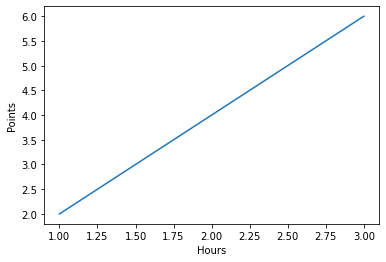

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

plt.plot(x_data, y_data)
plt.xlabel('Hours')
plt.ylabel('Points')
plt.show()

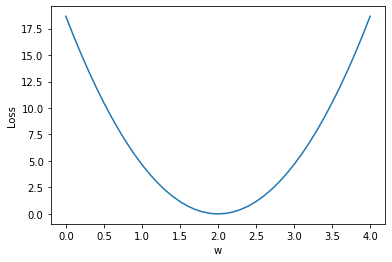

In [24]:
def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    l_sum = 0

    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l

    w_list.append(w)
    mse_list.append(l_sum / 3)

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

In [25]:
for w in np.arange(0.0, 4.1, 0.1):
    print('w=', w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += 1
        print('\t', x_val, y_val, y_pred_val, l)

    print('MSE=', l_sum / 3)

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 1.0
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 1.0
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 1.0
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 1.0
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 1.0
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 1.0
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 1.0
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.759999999999998
	 3.0 6.0 2.1 15.209999999999999
MSE= 1.0
w= 0.8
	 1.0 2.0 0.8 1.44
	 2.0 4.

## Lecture3 : Gradient Descent

**lr=0.0001**

In [39]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = 1.0

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient(x, y):
    return 2 * x * (x * w - y)

for epoch in range(100):
    l = 0
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.0001 * grad # lr = 0.01
        print('\tgrad:', x_val, y_val, grad)
        l += loss(x_val, y_val)
    mse = l / 3
    print('progress:', epoch, 'w=', w, 'mse=', mse)

print('test performance (after training)', '4 hours', forward(4))

	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.9984
	grad: 3.0 6.0 -17.98200288
progress: 0 w= 1.002798040288 mse= 4.647103684933728
	grad: 1.0 2.0 -1.9944039194240002
	grad: 2.0 4.0 -7.976020154560462
	grad: 3.0 6.0 -17.931688511482832
progress: 1 w= 1.0055882515465466 mse= 4.621134500579434
	grad: 1.0 2.0 -1.9888234969069067
	grad: 2.0 4.0 -7.953702928830101
	grad: 3.0 6.0 -17.881514924595834
progress: 2 w= 1.00837065568158 mse= 4.595310438559771
	grad: 1.0 2.0 -1.9832586886368402
	grad: 2.0 4.0 -7.931448147596452
	grad: 3.0 6.0 -17.831481725426343
progress: 3 w= 1.0111452745377456 mse= 4.569630687894629
	grad: 1.0 2.0 -1.9777094509245088
	grad: 2.0 4.0 -7.909255636137296
	grad: 3.0 6.0 -17.781588521163865
progress: 4 w= 1.0139121298985683 mse= 4.5440944421358545
	grad: 1.0 2.0 -1.9721757402028635
	grad: 2.0 4.0 -7.887125220219291
	grad: 3.0 6.0 -17.731834920097015
progress: 5 w= 1.01667124348662 mse= 4.518700899341934
	grad: 1.0 2.0 -1.9666575130267598
	grad: 2.0 4.0 -7.865056726096618
	grad

**lr=100**
- mse 발산


In [40]:
for epoch in range(100):
    l = 0
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 100 * grad # lr = 0.01
        print('\tgrad:', x_val, y_val, grad)
        l += loss(x_val, y_val)
    mse = l / 3
    print('progress:', epoch, 'w=', w, 'mse=', mse)

print('test performance (after training)', '4 hours', forward(4))

	grad: 1.0 2.0 -1.5112709243178921
	grad: 2.0 4.0 1202.971655757042
	grad: 3.0 6.0 -2162642.2941372227
progress: 0 w= 216144084.61960354 mse= 1.4015481260142042e+17
	grad: 1.0 2.0 432288165.2392071
	grad: 2.0 4.0 -344101379530.4088
	grad: 3.0 6.0 618608255050792.5
progress: 1 w= -6.182645837979865e+16 mse= 1.1467534442166607e+34
	grad: 1.0 2.0 -1.236529167595973e+17
	grad: 2.0 4.0 9.842772174063945e+19
	grad: 3.0 6.0 -1.7694843675923455e+23
progress: 2 w= 1.7685013207214608e+25 mse= 9.38279205268936e+50
	grad: 1.0 2.0 3.5370026414429216e+25
	grad: 2.0 4.0 -2.8154541025885656e+28
	grad: 3.0 6.0 5.061482612928594e+31
progress: 3 w= -5.0586706781436336e+33 mse= 7.677045763237095e+67
	grad: 1.0 2.0 -1.0117341356287267e+34
	grad: 2.0 4.0 8.053403719604665e+36
	grad: 3.0 6.0 -1.4478006536919284e+40
progress: 4 w= 1.446996319995433e+42 mse= 6.281395912844907e+84
	grad: 1.0 2.0 2.893992639990866e+42
	grad: 2.0 4.0 -2.303618141432729e+45
	grad: 3.0 6.0 4.1413295137606885e+48
progress: 5 w= -4.1

**lr=0.001**

In [41]:
w = 1.0

for epoch in range(100):
    l = 0
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.001 * grad # lr = 0.01
        print('\tgrad:', x_val, y_val, grad)
        l += loss(x_val, y_val)
    mse = l / 3
    print('progress:', epoch, 'w=', w, 'mse=', mse)

print('test performance (after training)', '4 hours', forward(4))

	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.984
	grad: 3.0 6.0 -17.820288
progress: 0 w= 1.027804288 mse= 4.474337080968227
	grad: 1.0 2.0 -1.944391424
	grad: 2.0 4.0 -7.7620105646079995
	grad: 3.0 6.0 -17.324807580205054
progress: 1 w= 1.054835497568813 mse= 4.228984580842744
	grad: 1.0 2.0 -1.890329004862374
	grad: 2.0 4.0 -7.546193387410597
	grad: 3.0 6.0 -16.843103640700452
progress: 2 w= 1.0811151236017864 mse= 3.997086107141394
	grad: 1.0 2.0 -1.8377697527964272
	grad: 2.0 4.0 -7.336376853163337
	grad: 3.0 6.0 -16.374793136260568
progress: 3 w= 1.1066640633440068 mse= 3.7779039016309057
	grad: 1.0 2.0 -1.7866718733119864
	grad: 2.0 4.0 -7.13239411826145
	grad: 3.0 6.0 -15.919503671959557
progress: 4 w= 1.1315026330075397 mse= 3.5707406614178154
	grad: 1.0 2.0 -1.7369947339849205
	grad: 2.0 4.0 -6.934082978067803
	grad: 3.0 6.0 -15.476873207047337
progress: 5 w= 1.1556505839266398 mse= 3.374937320559777
	grad: 1.0 2.0 -1.6886988321467205
	grad: 2.0 4.0 -6.741285737929708
	grad: 3.0 6.0 

**lr=0.01**

In [42]:
w = 1.0

for epoch in range(100):
    l = 0
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad # lr = 0.01
        print('\tgrad:', x_val, y_val, grad)
        l += loss(x_val, y_val)
    mse = l / 3
    print('progress:', epoch, 'w=', w, 'mse=', mse)

print('test performance (after training)', '4 hours', forward(4))

	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w= 1.260688 mse= 3.043723446698666
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 mse= 1.6636451591780546
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 mse= 0.9093188865954763
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 mse= 0.49701754785723473
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 mse= 0.271660961318966
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 mse= 0.14848505495009864
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678802925
	grad: 3.0 6.0 -2.650043120512